## Assignment 1 

In [157]:
# 1 First we should import our libriaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [203]:
# 2 Creating dataset
np.random.seed(42)

num_sample = 2500

squared_meters = np.random.randint(25,150,size=num_sample)
num_rooms = np.random.randint(1,5,size=num_sample)
building_age = np.random.randint(1,10,size=num_sample)

base_price = 120000
price_per_squared_meter = 4000
price_per_room = 25000
price_decreasing_per_age = -10000

noice = np.random.randint(0,10000,size=num_sample) * 25

price = base_price + (price_per_squared_meter * squared_meters) + (price_per_room * num_rooms) + (price_decreasing_per_age * building_age) + noice

data = pd.DataFrame({
    'Number of Rooms': num_rooms,
    'Building age': building_age,
    'Square Meters': squared_meters,
    'Price': price
})

data.head(10)

,Number of Rooms,Building age,Square Meters,Price
0,1,9,127,569000
1,2,3,76,530000
2,4,3,117,773775
3,3,2,39,570975
4,4,8,131,870850
5,2,1,96,670925
6,2,8,85,524200
7,4,7,45,558550
8,4,7,127,857875
9,1,3,146,919050


In [139]:
# 3 Seperation by metrics and targets (x,y)

X = data[['Number of Rooms', 'Square Meters', 'Building age']]
y = data['Price']

In [141]:
# 4 Separate by [test | learning] [train | test] samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [143]:
# 5 Train part tr
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [145]:
# 6 Making prediction xt
y_pred = model.predict(X_test)

In [147]:
# 7 Finding the MSE -> Mean Square Error y
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error is -> {}'.format(mse))

Mean Squared Error is -> 4982647106.019122


In [149]:
# 8 Finding the coefficient and interception
print('Model coefficient is -> {}'.format(model.coef_))
print('Interception is -> {}'.format(model.intercept_))

Model coefficient is -> [24206.79678028  4006.84814847 -9530.21242134]
Interception is -> 242473.20220769366


In [151]:
# 9 Creating the Comparison between actually price and predicted
comparison_df = pd.DataFrame({
    'Actual price': y_test,
    'Predicted price': y_pred
})
comparison_df.tail(10)

,Actual price,Predicted price
220,665275,614144.810899
2486,569075,529238.468327
1659,550525,548133.185281
527,789575,881032.997383
1486,726050,627250.755794
2375,499000,508396.119575
1609,370350,405357.591504
596,561250,539034.088534
84,739600,680524.882070
2213,539000,492799.842656


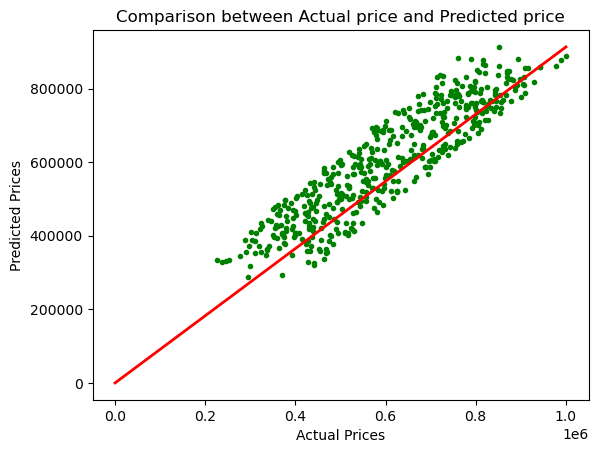

In [201]:
# 10 Data visualisation with Matplotlib
plt.scatter(y_test,y_pred,marker='.',color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison between Actual price and Predicted price')
plt.plot([0,max(y_test)],[0,max(y_pred)], color='red',linewidth=2)
plt.show()

In [159]:
# normolize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [173]:
# Creating Gradient Descent function
def gradient_descent(X,y,learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])  # Initialize parameters
    cost_history = []

    for i in range(iterations):
        # Calculate predictions
        predictions = X.dot(theta)
        # Calculate error
        error = predictions - y
        # Calculate cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Update parameters
        theta -= (learning_rate / m) * (X.T.dot(error))

    return theta, cost_history

In [175]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # Add bias term

In [191]:
theta, cost_history = gradient_descent(X_b, y, learning_rate=0.01, iterations=1000)

In [192]:
print("Theta (parameters):", theta)


Theta (parameters): [602431.66115087  28907.37012824 146623.88001516 -24549.51194343]


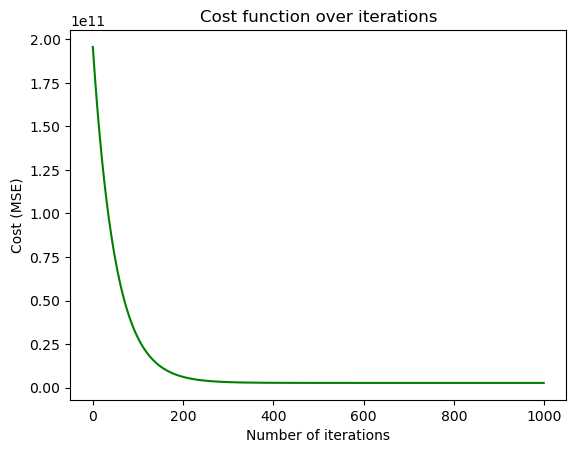

In [197]:
plt.plot(range(len(cost_history)), cost_history, color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost function over iterations')
plt.show()